In [25]:
import torch
from torchvision import transforms as T
from lightly.transforms import SimCLRTransform, DINOTransform, MAETransform, MoCoV2Transform, utils
from datasets import create_dataset
from models import MAEModel
import pytorch_lightning as pl
import os
import copy
import gc
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import os
from pathlib import Path
from models import BYOLModel, SimCLRModel

In [26]:

import eval
import importlib
import models
from eval import *
importlib.reload(models)
importlib.reload(eval)

<module 'eval' from 'c:\\Users\\User\\Desktop\\studia\\Sem 6\\WB\\nowewb\\Warsztaty_Badawcze\\eval.py'>

# UWAGA NA ŚCIEŻKI
{imagenet, cifar100}/{byol, mae, simclr}/model

# WSSZYTSKIE

In [29]:
config=Config()
results_df = run_complete_evaluation(config)

# Wyświetl podsumowanie
print("=== EVALUATION SUMMARY ===")
print(f"Total models evaluated: {len(results_df)}")
print(f"\nTop 5 models (Linear Probing):")
print(results_df.nlargest(5, 'linear_probing_accuracy')[
    ['method', 'train_dataset', 'test_dataset', 'linear_probing_accuracy']
])

print(f"\nTop 5 models (k-NN):")
print(results_df.nlargest(5, 'best_knn_accuracy')[
    ['method', 'train_dataset', 'test_dataset', 'best_knn_accuracy', 'best_knn_k']
])



Evaluating mae trained on cifar100, testing on cifar10
Checkpoint: ./checkpoints\cifar100\mae\pre-290\model_epoch_15.ckpt
Loading mae model: {'train_dataset': 'cifar100', 'method': 'mae', 'version': 'pre-290', 'filename': 'model_epoch_15.ckpt', 'pretrained': True, 'lr': 0.01, 'hyperparam': 0.9}


Extracting features: 100%|██████████| 40/40 [00:17<00:00,  2.28it/s]
Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name         | Type               | Params | Mode 
------------------------------------------------------------
0 | model        | Sequential         | 11.2 M | train
1 | criterion    | CrossEntropyLoss   | 0      | train
2 | train_metric | MulticlassAccuracy | 0      | train
3 | val_metric   | MulticlassAccuracy | 0      | train
4 | test_metric  | MulticlassAccuracy | 0      | train
------------------------------------------------------------
11.2 M    Trainable params
0         Non-trainable params
11.2 M    Total params
44.727    Total estimated model params size (MB)
7         Modules in train mode


Epoch 0: 100%|██████████| 196/196 [01:02<00:00,  3.15it/s, v_num=23, train_loss=2.300, val_loss=2.300, val_acc=0.100, train_acc=0.101]

`Trainer.fit` stopped: `max_epochs=1` reached.


Epoch 0: 100%|██████████| 196/196 [01:03<00:00,  3.10it/s, v_num=23, train_loss=2.300, val_loss=2.300, val_acc=0.100, train_acc=0.101]


Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name         | Type               | Params | Mode 
------------------------------------------------------------
0 | model        | Sequential         | 11.2 M | train
1 | criterion    | CrossEntropyLoss   | 0      | train
2 | train_metric | MulticlassAccuracy | 0      | train
3 | val_metric   | MulticlassAccuracy | 0      | train
4 | test_metric  | MulticlassAccuracy | 0      | train
------------------------------------------------------------
5.1 K     Trainable params
11.2 M    Non-trainable params
11.2 M    Total params
44.727    Total estimated model params size (MB)
7         Modules in train mode
67        Modules in eval mode


Epoch 0: 100%|██████████| 196/196 [00:33<00:00,  5.90it/s, v_num=24, train_loss=2.330, val_loss=2.330, val_acc=0.100, train_acc=0.0968]

`Trainer.fit` stopped: `max_epochs=1` reached.


Epoch 0: 100%|██████████| 196/196 [00:33<00:00,  5.83it/s, v_num=24, train_loss=2.330, val_loss=2.330, val_acc=0.100, train_acc=0.0968]

Evaluating mae trained on cifar100, testing on cifar100
Checkpoint: ./checkpoints\cifar100\mae\pre-290\model_epoch_15.ckpt
Loading mae model: {'train_dataset': 'cifar100', 'method': 'mae', 'version': 'pre-290', 'filename': 'model_epoch_15.ckpt', 'pretrained': True, 'lr': 0.01, 'hyperparam': 0.9}


Extracting features: 100%|██████████| 40/40 [00:20<00:00,  1.91it/s]
Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name         | Type               | Params | Mode 
------------------------------------------------------------
0 | model        | Sequential         | 11.2 M | train
1 | criterion    | CrossEntropyLoss   | 0      | train
2 | train_metric | MulticlassAccuracy | 0      | train
3 | val_metric   | MulticlassAccuracy | 0      | train
4 | test_metric  | MulticlassAccuracy | 0      | train
------------------------------------------------------------
11.2 M    Trainable params
0         Non-trainable params
11.2 M    Total params
44.911    Total estimated model params size (MB)
7         Modules in train mode


Epoch 0: 100%|██████████| 196/196 [00:59<00:00,  3.27it/s, v_num=25, train_loss=4.610, val_loss=4.610, val_acc=0.010, train_acc=0.00938]

`Trainer.fit` stopped: `max_epochs=1` reached.


Epoch 0: 100%|██████████| 196/196 [01:00<00:00,  3.24it/s, v_num=25, train_loss=4.610, val_loss=4.610, val_acc=0.010, train_acc=0.00938]


Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name         | Type               | Params | Mode 
------------------------------------------------------------
0 | model        | Sequential         | 11.2 M | train
1 | criterion    | CrossEntropyLoss   | 0      | train
2 | train_metric | MulticlassAccuracy | 0      | train
3 | val_metric   | MulticlassAccuracy | 0      | train
4 | test_metric  | MulticlassAccuracy | 0      | train
------------------------------------------------------------
51.3 K    Trainable params
11.2 M    Non-trainable params
11.2 M    Total params
44.911    Total estimated model params size (MB)
7         Modules in train mode
67        Modules in eval mode


Epoch 0: 100%|██████████| 196/196 [00:26<00:00,  7.33it/s, v_num=26, train_loss=4.690, val_loss=4.690, val_acc=0.010, train_acc=0.00946]

`Trainer.fit` stopped: `max_epochs=1` reached.


Epoch 0: 100%|██████████| 196/196 [00:26<00:00,  7.28it/s, v_num=26, train_loss=4.690, val_loss=4.690, val_acc=0.010, train_acc=0.00946]
Skipping ./checkpoints\imagenet\mae - directory not found
Skipping ./checkpoints\imagenet\byol - directory not found
Skipping ./checkpoints\imagenet\simclr - directory not found
# SSL Model Evaluation Report



## Best Performing Models

Best Linear Probing: mae (train: cifar100, test: cifar10) - Accuracy: 0.1000

Best k-NN: mae (train: cifar100, test: cifar10) - Accuracy: 0.1662 (k=50)


## Method Comparison (Average Accuracies)

        linear_probing_accuracy  best_knn_accuracy
method                                            
mae                       0.055             0.0941
=== EVALUATION SUMMARY ===
Total models evaluated: 2

Top 5 models (Linear Probing):
  method train_dataset test_dataset  linear_probing_accuracy
0    mae      cifar100      cifar10                     0.10
1    mae      cifar100     cifar100                     0.01

Top 5 

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x000002A29C776C20>
Traceback (most recent call last):
  File "c:\Users\User\Desktop\studia\Sem 6\WB\Warsztaty_Badawcze\.conda\lib\site-packages\torch\utils\data\dataloader.py", line 1618, in __del__
  File "c:\Users\User\Desktop\studia\Sem 6\WB\Warsztaty_Badawcze\.conda\lib\site-packages\torch\utils\data\dataloader.py", line 1576, in _shutdown_workers
AttributeError: '_MultiProcessingDataLoaderIter' object has no attribute '_workers_status'


=== Performance by Method ===
       linear_probing_accuracy              best_knn_accuracy               
                          mean     std  max              mean    std     max
method                                                                      
mae                      0.055  0.0636  0.1            0.0941  0.102  0.1662


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x000002A29C776C20>
Traceback (most recent call last):
  File "c:\Users\User\Desktop\studia\Sem 6\WB\Warsztaty_Badawcze\.conda\lib\site-packages\torch\utils\data\dataloader.py", line 1618, in __del__
  File "c:\Users\User\Desktop\studia\Sem 6\WB\Warsztaty_Badawcze\.conda\lib\site-packages\torch\utils\data\dataloader.py", line 1576, in _shutdown_workers
AttributeError: '_MultiProcessingDataLoaderIter' object has no attribute '_workers_status'


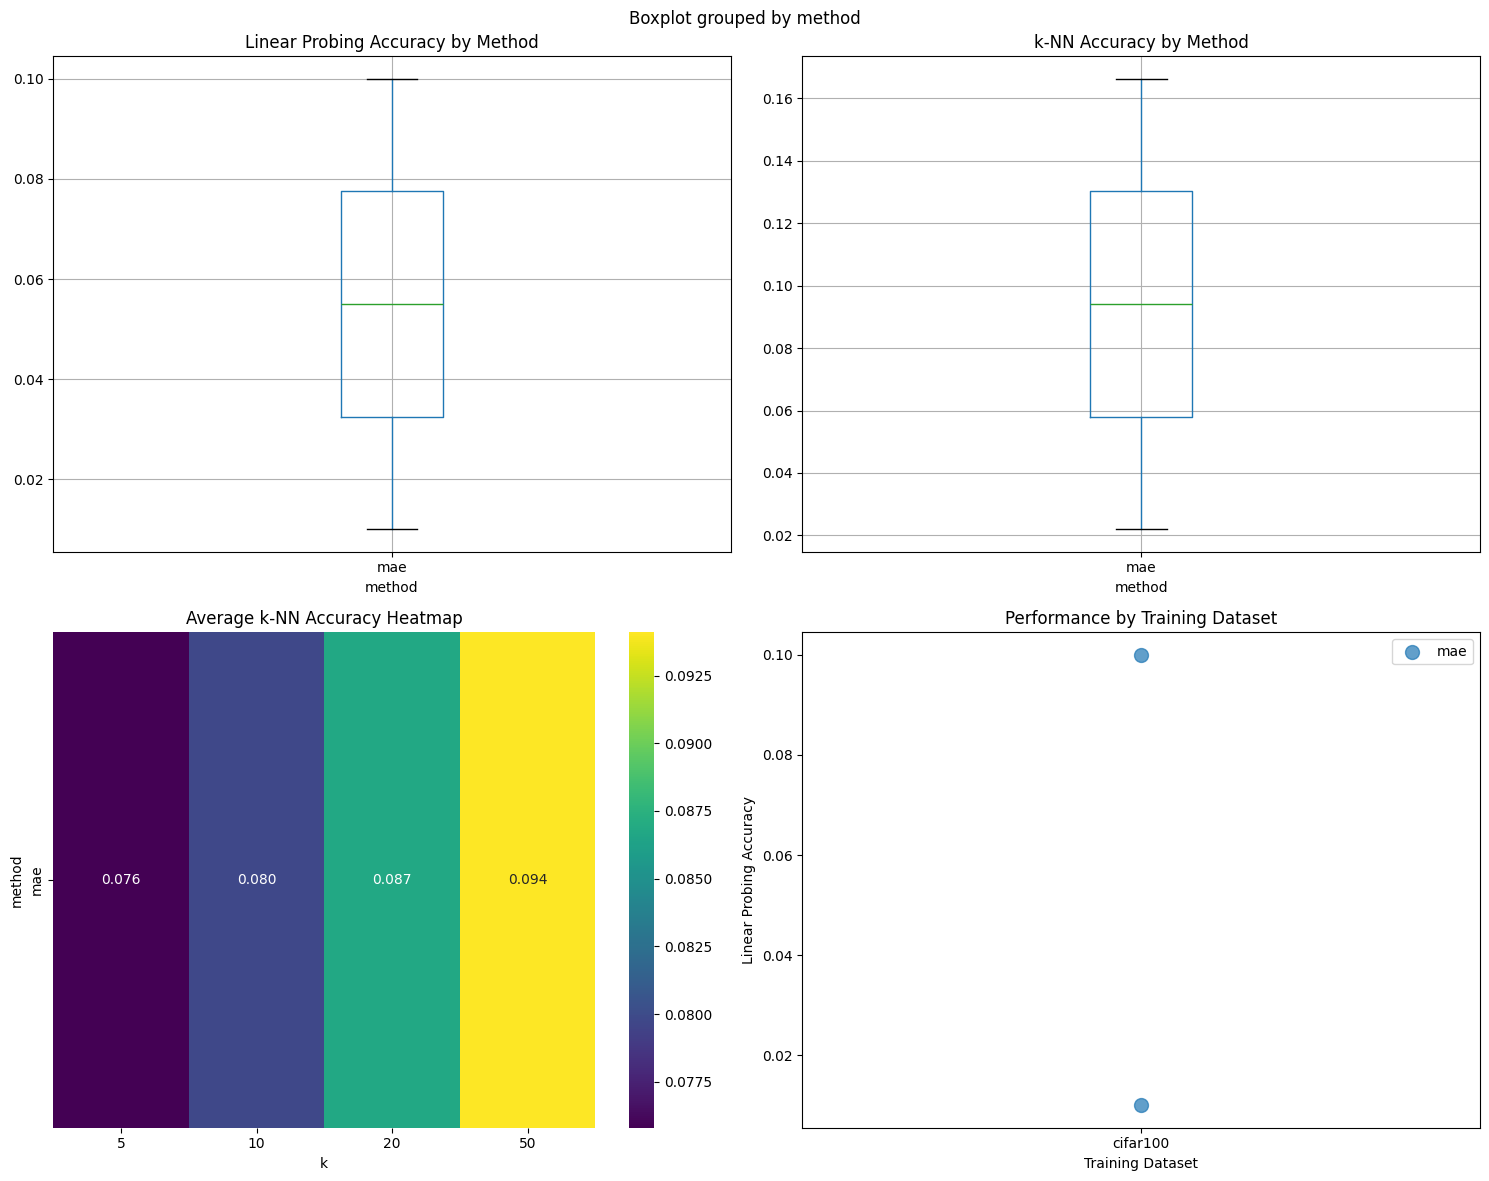

In [30]:

method_stats = results_df.groupby('method').agg({
    'linear_probing_accuracy': ['mean', 'std', 'max'],
    'best_knn_accuracy': ['mean', 'std', 'max']
}).round(4)

print("=== Performance by Method ===")
print(method_stats)

# Wizualizacja
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Box plot dla linear probing
results_df.boxplot(column='linear_probing_accuracy', by='method', ax=axes[0,0])
axes[0,0].set_title('Linear Probing Accuracy by Method')

# Box plot dla k-NN
results_df.boxplot(column='best_knn_accuracy', by='method', ax=axes[0,1])
axes[0,1].set_title('k-NN Accuracy by Method')

# Heatmap dla różnych wartości k
knn_data = []
for _, row in results_df.iterrows():
    if 'knn_results' in row and row['knn_results']:
        for k, acc in row['knn_results'].items():
            knn_data.append({
                'method': row['method'],
                'k': k,
                'accuracy': acc
            })

knn_df = pd.DataFrame(knn_data)
knn_pivot = knn_df.pivot_table(values='accuracy', index='method', columns='k', aggfunc='mean')
sns.heatmap(knn_pivot, annot=True, fmt='.3f', ax=axes[1,0], cmap='viridis')
axes[1,0].set_title('Average k-NN Accuracy Heatmap')

# Scatter plot: train vs test dataset performance
for method in results_df['method'].unique():
    method_data = results_df[results_df['method'] == method]
    axes[1,1].scatter(method_data['train_dataset'], 
                      method_data['linear_probing_accuracy'],
                      label=method, s=100, alpha=0.7)
axes[1,1].set_xlabel('Training Dataset')
axes[1,1].set_ylabel('Linear Probing Accuracy')
axes[1,1].set_title('Performance by Training Dataset')
axes[1,1].legend()

plt.tight_layout()
plt.show()



# CROSS-DATASET PERFORMANCE

=== Cross-Dataset Performance Matrix ===
test_dataset          cifar10  cifar100
method train_dataset                   
mae    cifar100           0.1      0.01


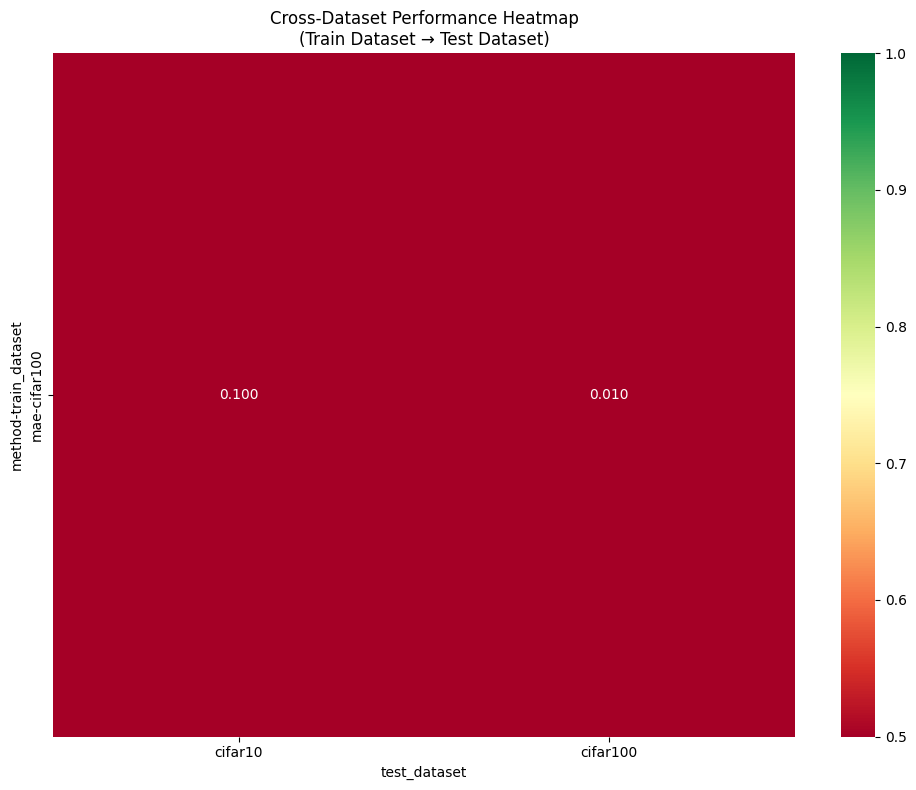

In [31]:

cross_dataset = results_df.pivot_table(
    values='linear_probing_accuracy',
    index=['method', 'train_dataset'],
    columns='test_dataset',
    aggfunc='mean'
)

print("=== Cross-Dataset Performance Matrix ===")
print(cross_dataset)

# Wizualizacja
plt.figure(figsize=(10, 8))
sns.heatmap(cross_dataset, annot=True, fmt='.3f', cmap='RdYlGn', 
            vmin=0.5, vmax=1.0, center=0.75)
plt.title('Cross-Dataset Performance Heatmap\n(Train Dataset → Test Dataset)')
plt.tight_layout()
plt.show()

